In [1]:
data <- data.frame(
yearsExp = c(1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7),
Salary = c(39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00,
           54445.00, 64445.00, 57189.00)
)

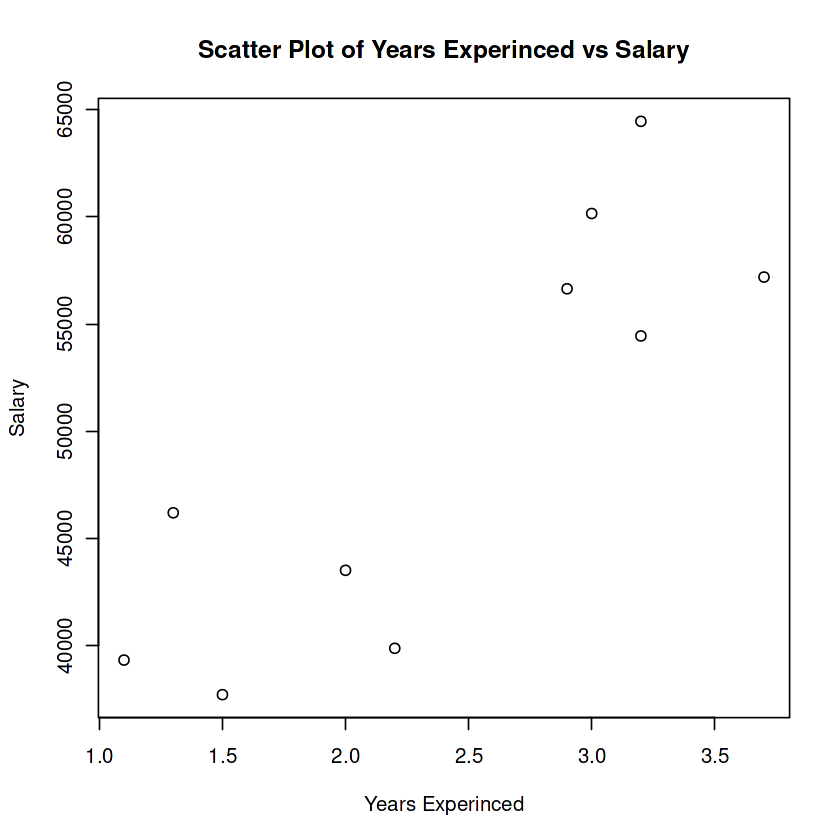

In [2]:
plot(data$yearsExp, data$Salary,
xlab = 'Years Experinced',
ylab = 'Salary',
main = 'Scatter Plot of Years Experinced vs Salary')

In [3]:
install.packages('caTools')
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
split = sample.split(data$Salary, SplitRatio = 0.7)
trainingSet = subset(data, split == TRUE)
testSet = subset(data, split == FALSE)
lm.r = lm(formula = Salary ~ yearsExp,
data = trainingSet)

In [5]:
summary(lm.r)


Call:
lm(formula = Salary ~ yearsExp, data = trainingSet)

Residuals:
    2     3     4     5     6     7     8 
 7145 -3191 -2052 -7548  2686  5263 -2304 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    26957       7433   3.626   0.0151 *
yearsExp        9310       3093   3.010   0.0298 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5703 on 5 degrees of freedom
Multiple R-squared:  0.6444,	Adjusted R-squared:  0.5733 
F-statistic:  9.06 on 1 and 5 DF,  p-value: 0.02976


In [6]:
newData <- data.frame(yearsExp = c (4.0, 4.5, 5.0))
predictSalaries <- predict(lm.r, newdata = newData)
print(predictSalaries)

       1        2        3 
64197.01 68852.05 73507.10 


In [7]:
library(ggplot2)

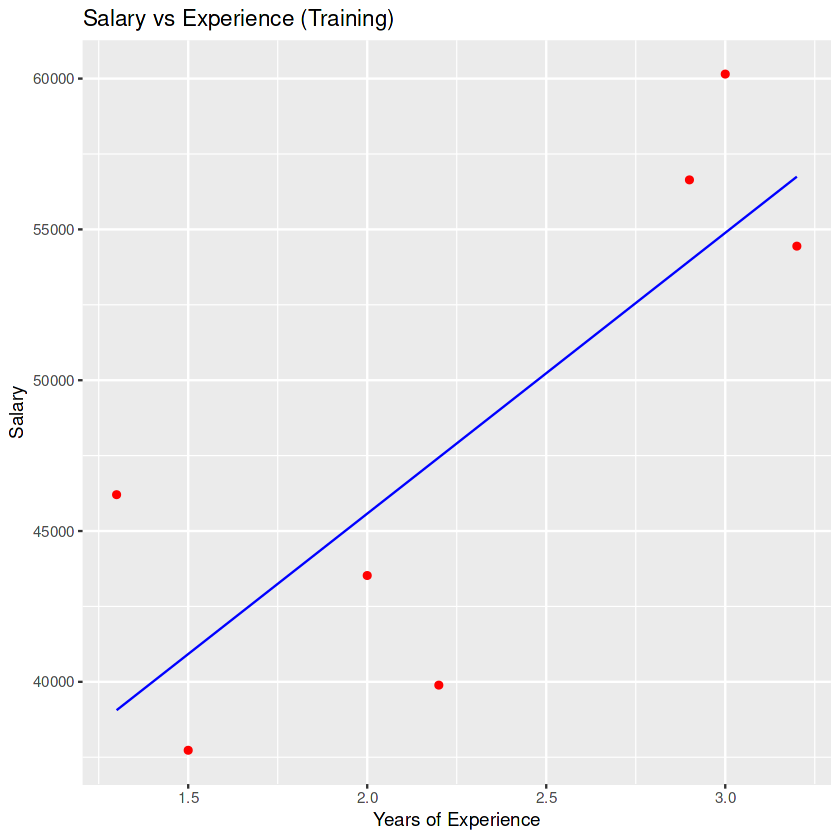

In [8]:
ggplot() +
geom_point(aes(x = trainingSet$yearsExp, y = trainingSet$Salary), color ='red') +
geom_line(aes(x = trainingSet$yearsExp, y = predict(lm.r, newdata = trainingSet)), color = 'blue') +
ggtitle('Salary vs Experience (Training)') +
xlab('Years of Experience') +
ylab('Salary')